In [1]:
import json
import os.path as path
from dataclasses import dataclass
from datetime import datetime, timedelta
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np

In [2]:
root_directory_path = r'./data/AttackResults'

In [3]:
byte_sizes = [16 * i for i in range(1, 17)]
byte_sizes

[16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 256]

In [4]:
@dataclass
class AttackResult:
    elapsed: timedelta
    exponents_check_count: int
    error_message: Optional[str]
    is_unexpected_result: bool

In [5]:
def parse_timedelta(value: str) -> timedelta:
    t = datetime.strptime(value[:-1], '%H:%M:%S.%f')
    return timedelta(hours=t.hour, minutes=t.minute, seconds=t.second, microseconds=t.microsecond)


def read_attack_result(file_path) -> AttackResult:
    with open(file_path, 'r') as input:
        file_content = input.read()
    j = json.loads(file_content)

    return AttackResult(
        elapsed=parse_timedelta(j['Elapsed']),
        exponents_check_count=j['ExponentsCheckCount'],
        error_message=j['ErrorMessage'],
        is_unexpected_result=j['IsUnexpectedResult']
    )

In [6]:
extract_total_seconds = np.vectorize(lambda x: x.total_seconds())

In [7]:
elapsed_time = np.empty((16, 100), dtype=timedelta)
exponents_check_count = np.empty((16, 100), dtype=int)

for (byte_size, i) in zip(byte_sizes, range(len(byte_sizes))):
    for y in range(100):
        file_path = path.join(root_directory_path, str(byte_size), f'{y}.json')
        attack_result = read_attack_result(file_path)
        elapsed_time[i, y] = attack_result.elapsed
        exponents_check_count[i, y] = attack_result.exponents_check_count

elapsed_time_s = extract_total_seconds(elapsed_time)

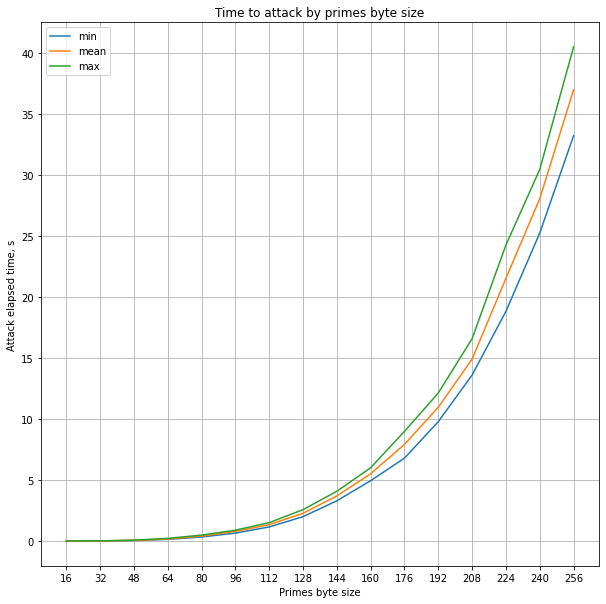

In [8]:
plt.figure(figsize=(10, 10))
plt.xticks(byte_sizes)
plt.grid()
plt.plot(byte_sizes,np.min(elapsed_time_s, axis=1))
plt.plot(byte_sizes,np.mean(elapsed_time_s, axis=1))
plt.plot(byte_sizes,np.max(elapsed_time_s, axis=1))
plt.legend(['min', 'mean', 'max'])
plt.xlabel('Primes byte size')
plt.ylabel('Attack elapsed time, s')
plt.title('Time to attack by primes byte size');

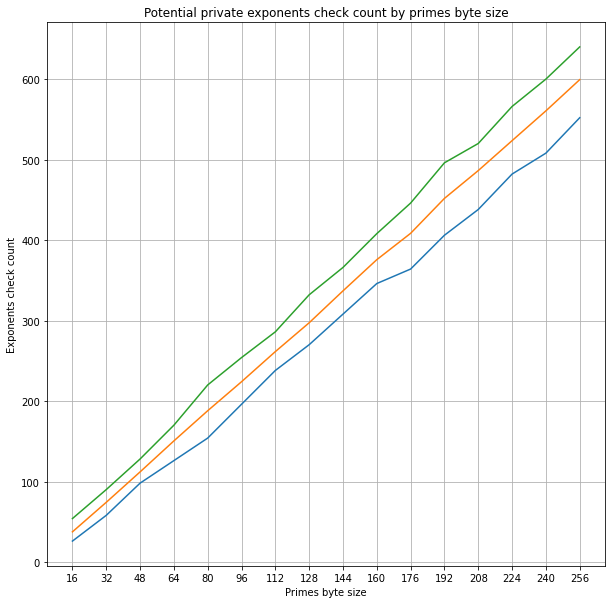

In [9]:
plt.figure(figsize=(10, 10))
plt.xticks(byte_sizes)
plt.grid()
plt.plot(byte_sizes, np.min(exponents_check_count, axis=1))
plt.plot(byte_sizes, np.mean(exponents_check_count, axis=1))
plt.plot(byte_sizes, np.max(exponents_check_count, axis=1))
plt.xlabel('Primes byte size')
plt.ylabel('Exponents check count')
plt.title('Potential private exponents check count by primes byte size');